In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
hash_data = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study.xlsx', sheet_name=[1,2])

In [3]:
#converting the excel files to csv and saving it to local drive
hash_data[1].to_csv('existing_employees.csv')
hash_data[2].to_csv('Employees_who_have_left.csv')
# loading the saved csv file 
existing = pd.read_csv('existing_employees.csv')
attrited = pd.read_csv('Employees_who_have_left.csv')
existing.columns
attrited.columns

Index(['Unnamed: 0', 'Emp_ID', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [4]:
Emp_ID = existing.Emp_ID
existing

,Unnamed: 0,Emp_ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,4,2005,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
11423,11423,14207,0.90,0.55,3,259,10,1,1,management,high
11424,11424,14208,0.74,0.95,5,266,10,0,1,management,high
11425,11425,14209,0.85,0.54,3,185,10,0,1,management,high
11426,11426,14210,0.33,0.65,3,172,10,0,1,marketing,high


In [5]:
attrited.shape

(3571, 11)

In [6]:
existing.drop(axis=1, labels=['Emp_ID','Unnamed: 0'], inplace=True)
attrited.drop(axis=1, labels=['Emp_ID','Unnamed: 0'], inplace=True)
existing.shape

(11428, 9)

In [7]:
attrited.shape

(3571, 9)

In [8]:
#existing['status'] = 'existing'

In [9]:
existing

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,sales,low
1,0.82,0.67,2,202,3,0,0,sales,low
2,0.45,0.69,5,193,3,0,0,sales,low
3,0.78,0.82,5,247,3,0,0,sales,low
4,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,management,high
11424,0.74,0.95,5,266,10,0,1,management,high
11425,0.85,0.54,3,185,10,0,1,management,high
11426,0.33,0.65,3,172,10,0,1,marketing,high


In [10]:
attrited

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
3566,0.40,0.57,2,151,3,0,0,support,low
3567,0.37,0.48,2,160,3,0,0,support,low
3568,0.37,0.53,2,143,3,0,0,support,low
3569,0.11,0.96,6,280,4,0,0,support,low


In [11]:
existing.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
11423,False,False,False,False,False,False,False,False,False
11424,False,False,False,False,False,False,False,False,False
11425,False,False,False,False,False,False,False,False,False
11426,False,False,False,False,False,False,False,False,False


In [12]:
attrited.isna().count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
promotion_last_5years    3571
dept                     3571
salary                   3571
dtype: int64

# <span class="girk">Data Visualization</span>

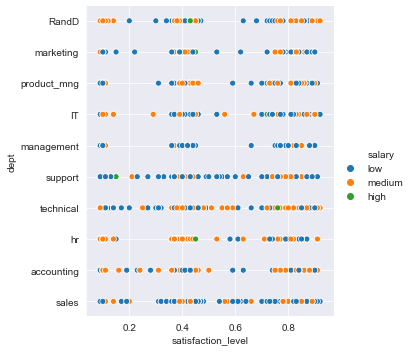

In [13]:
sbn.set_style(style='darkgrid')
sbn.relplot(x='satisfaction_level', y='dept', data=attrited, hue='salary')

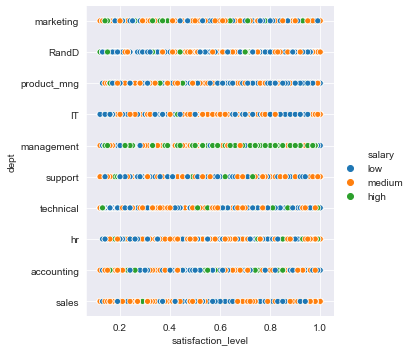

In [14]:
sbn.relplot(x='satisfaction_level', y='dept', data=existing, hue='salary')

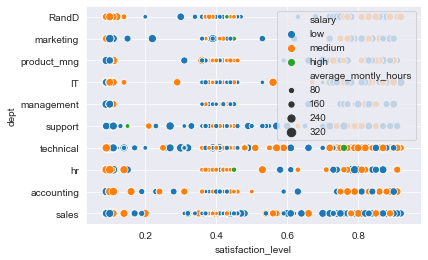

In [15]:

sbn.scatterplot(x='satisfaction_level', y='dept', data=attrited, hue='salary', size='average_montly_hours')

In [16]:
existing.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

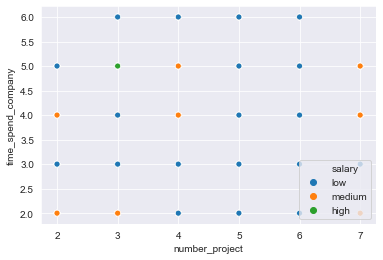

In [17]:
sbn.scatterplot(x= 'number_project', y='time_spend_company', hue='salary', data=attrited)

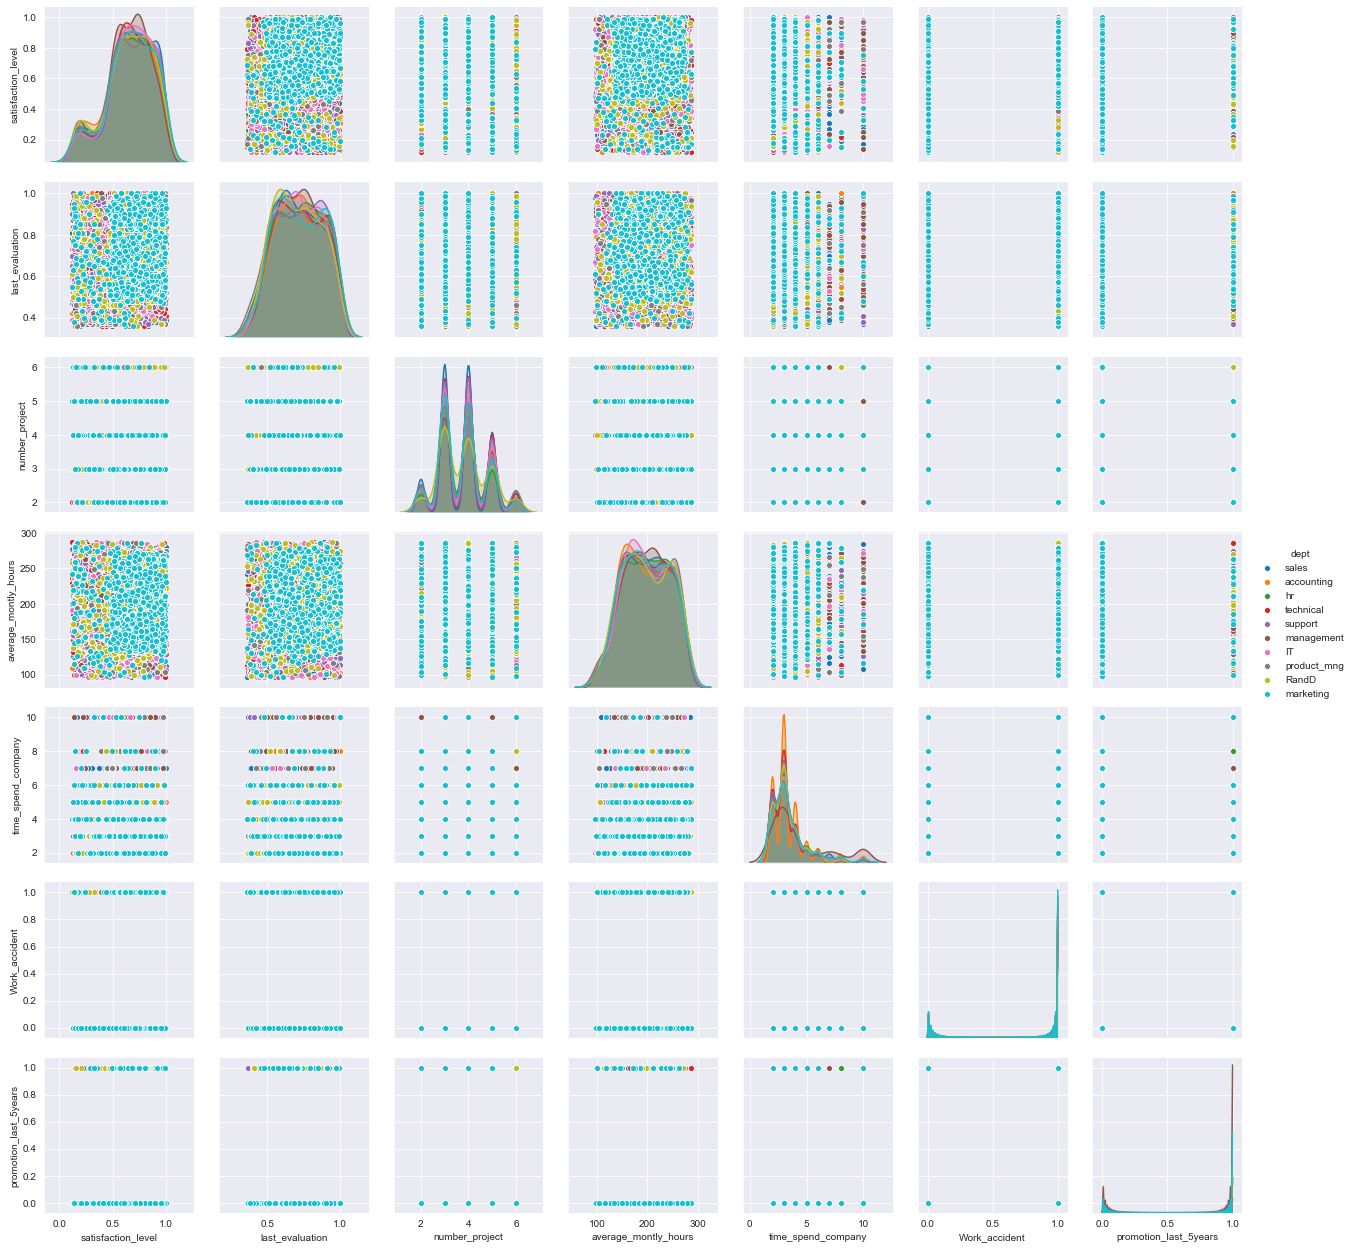

In [18]:
sbn.pairplot(data=existing, hue='dept', kind='scatter')

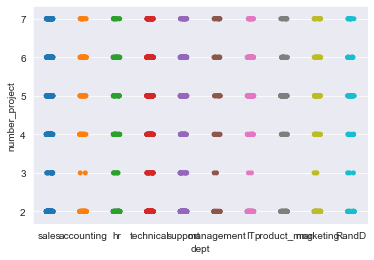

In [19]:
sbn.stripplot(x='dept', y='number_project', data=attrited)

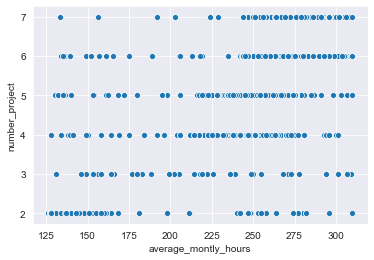

In [20]:
sbn.scatterplot(x='average_montly_hours', y='number_project', data=attrited)

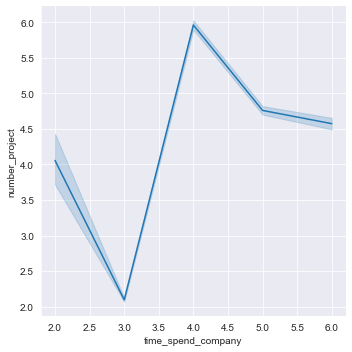

In [21]:
sbn.relplot(x='time_spend_company', y='number_project', data=attrited, kind='line')

In [22]:
#sbn.heatmap(data=existing.iloc[:,0:7].corr(), annot=True)

In [23]:
attrited.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [24]:
ex_dept = existing.groupby(['dept'])['average_montly_hours'].mean()
ex_dept

dept
IT             198.886792
RandD          198.951952
accounting     199.037300
hr             199.250000
management     200.233766
marketing      198.888550
product_mng    197.765625
sales          199.571657
support        199.140980
technical      198.471083
Name: average_montly_hours, dtype: float64

In [25]:
attri = attrited.groupby(['dept'])['average_montly_hours'].mean()
attri

dept
IT             213.849817
RandD          210.975207
accounting     207.029412
hr             197.306977
management     207.263736
marketing      200.990148
product_mng    207.787879
sales          205.041420
support        205.636036
technical      214.183644
Name: average_montly_hours, dtype: float64

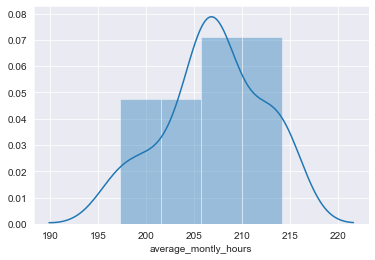

In [26]:
sbn.distplot(a=attri, )

In [27]:
existing.groupby(['salary'])['average_montly_hours'].mean()

salary
high      200.348052
low       198.617418
medium    199.214272
Name: average_montly_hours, dtype: float64

In [28]:
attrited.groupby(['salary'])['average_montly_hours'].mean()

salary
high      193.097561
low       206.631215
medium    209.610478
Name: average_montly_hours, dtype: float64

In [29]:
existing.groupby(['dept'])['satisfaction_level'].mean()


dept
IT             0.677170
RandD          0.653799
accounting     0.647211
hr             0.666679
management     0.654861
marketing      0.669878
product_mng    0.658466
sales          0.668548
support        0.673799
technical      0.668319
Name: satisfaction_level, dtype: float64

In [30]:
attrited.groupby(['dept'])['satisfaction_level'].mean()

dept
IT             0.411868
RandD          0.432810
accounting     0.402598
hr             0.433395
management     0.422857
marketing      0.453153
product_mng    0.481566
sales          0.447663
support        0.450901
technical      0.432525
Name: satisfaction_level, dtype: float64

In [31]:
existing.groupby(['salary'])['satisfaction_level'].mean()

salary
high      0.651879
low       0.668103
medium    0.668875
Name: satisfaction_level, dtype: float64

In [32]:
attrited.groupby(['salary'])['satisfaction_level'].mean()

salary
high      0.434512
low       0.441248
medium    0.438550
Name: satisfaction_level, dtype: float64

In [33]:
existing.groupby(['dept'])['promotion_last_5years'].mean()

dept
IT             0.000000
RandD          0.040541
accounting     0.024867
hr             0.028626
management     0.122449
marketing      0.065649
product_mng    0.000000
sales          0.029750
support        0.010155
technical      0.012358
Name: promotion_last_5years, dtype: float64

In [34]:
attrited.groupby(['dept'])['promotion_last_5years'].mean()

dept
IT             0.010989
RandD          0.000000
accounting     0.000000
hr             0.000000
management     0.032967
marketing      0.000000
product_mng    0.000000
sales          0.006903
support        0.005405
technical      0.004304
Name: promotion_last_5years, dtype: float64

In [35]:
existing.groupby(['salary'])['promotion_last_5years'].mean()

salary
high      0.062338
low       0.010109
medium    0.034315
Name: promotion_last_5years, dtype: float64

In [36]:
attrited.groupby(['salary'])['promotion_last_5years'].mean()

salary
high      0.000000
low       0.006446
medium    0.003797
Name: promotion_last_5years, dtype: float64

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.        , 0.00064457, 0.00128913, 0.0019337 , 0.00257827,
        0.00322284, 0.0038674 , 0.00451197, 0.00515654, 0.0058011 ,
        0.00644567]),
 <a list of 10 Patch objects>)

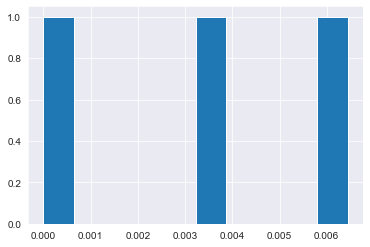

In [37]:
plt.hist(x=attrited.groupby(['salary'])['promotion_last_5years'].mean())

(array([5., 2., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.0032967 , 0.00659341, 0.00989011, 0.01318681,
        0.01648352, 0.01978022, 0.02307692, 0.02637363, 0.02967033,
        0.03296703]),
 <a list of 10 Patch objects>)

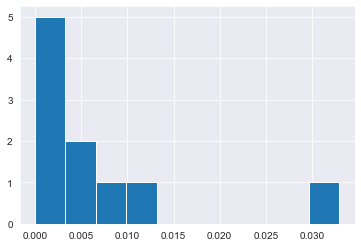

In [38]:
plt.hist(x=attrited.groupby(['dept'])['promotion_last_5years'].mean())

([<matplotlib.patches.Wedge at 0x190595c2b08>,
 [Text(1.0993445545732177, 0.0379677538210257, ''),
  Text(1.097378999399611, 0.07589026075003832, ''),
  Text(1.097378999399611, 0.07589026075003832, ''),
  Text(1.097378999399611, 0.07589026075003832, ''),
  Text(1.0836528865456914, 0.18893496627461814, ''),
  Text(1.058313317989584, 0.2999548648811646, ''),
  Text(1.058313317989584, 0.2999548648811646, ''),
  Text(1.0515596713657163, 0.3228347217342444, ''),
  Text(1.038292951764181, 0.3632461236088065, ''),
  Text(1.026731381518665, 0.39474380325063224, '')])

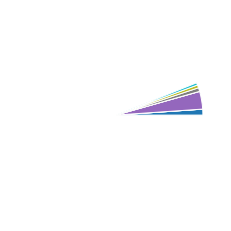

In [39]:
plt.pie(x=attrited.groupby(['dept'])['promotion_last_5years'].mean())

In [40]:
attrited.dept.value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

In [41]:
attrited.salary.value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

Feature Engineering 

In [42]:
attrited.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
5,0.41,0.50,2,153,3,0,0,sales,low
6,0.10,0.77,6,247,4,0,0,sales,low
7,0.92,0.85,5,259,5,0,0,sales,low
8,0.89,1.00,5,224,5,0,0,sales,low
9,0.42,0.53,2,142,3,0,0,sales,low


Transforming the  dept and salary column using one_hot_encoding

In [43]:
x = attrited
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
3566,0.40,0.57,2,151,3,0,0,support,low
3567,0.37,0.48,2,160,3,0,0,support,low
3568,0.37,0.53,2,143,3,0,0,support,low
3569,0.11,0.96,6,280,4,0,0,support,low


In [44]:
y = existing
y

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,sales,low
1,0.82,0.67,2,202,3,0,0,sales,low
2,0.45,0.69,5,193,3,0,0,sales,low
3,0.78,0.82,5,247,3,0,0,sales,low
4,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,management,high
11424,0.74,0.95,5,266,10,0,1,management,high
11425,0.85,0.54,3,185,10,0,1,management,high
11426,0.33,0.65,3,172,10,0,1,marketing,high


Encoding and Transforming the categorical value of the x_dataset

In [45]:
x_transformers = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), ['dept','salary'])],
                                   remainder='passthrough')

y_transformers = ColumnTransformer(transformers=[('one_hot_encoder', OneHotEncoder(), ['dept', 'salary'])],
                                   remainder='passthrough')


In [46]:
x = x_transformers.fit_transform(x)
y = y_transformers.fit_transform(y)



In [47]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.41,0.50,2.0,153.0,3.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.10,0.77,6.0,247.0,4.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.92,0.85,5.0,259.0,5.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.89,1.00,5.0,224.0,5.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.42,0.53,2.0,142.0,3.0,0.0,0.0


In [48]:
attrited.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
5,0.41,0.50,2,153,3,0,0,sales,low
6,0.10,0.77,6,247,4,0,0,sales,low
7,0.92,0.85,5,259,5,0,0,sales,low
8,0.89,1.00,5,224,5,0,0,sales,low
9,0.42,0.53,2,142,3,0,0,sales,low


In [49]:
x.rename(columns={0:'IT', 5:'Marketing', 4:'Management', 7:'Sales', 2:'Accounting',
                  3:'Hr', 9:'Technical',8:'Support', 6:'Product_mng', 1:'RandD', 13:'Satisfaction_level',
                  14:'Last_evaluation', 15:'Number_project', 16:'Average_montly_hours', 17:'Time_spend_company',
                  18:'Work_accident', 19:'Promotion_last_5years',11:'Low_salary', 12:'Medium_salary', 10:'High_salary'},
                  inplace=True)

In [50]:
x.head(20)

,IT,RandD,Accounting,Hr,Management,Marketing,Product_mng,Sales,Support,Technical,High_salary,Low_salary,Medium_salary,Satisfaction_level,Last_evaluation,Number_project,Average_montly_hours,Time_spend_company,Work_accident,Promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.41,0.50,2.0,153.0,3.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.10,0.77,6.0,247.0,4.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.92,0.85,5.0,259.0,5.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.89,1.00,5.0,224.0,5.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.42,0.53,2.0,142.0,3.0,0.0,0.0


In [51]:
#x.drop(labels=['IT','RandD','Accounting','Hr','Management','Marketing','Product_mng', 'Sales','Support','Technical',
#               'Average_montly_hours','Last_evaluation'], axis=1, inplace=True)



In [52]:
y.rename(columns={0:'IT', 5:'Marketing', 4:'Management', 7:'Sales', 2:'Accounting',
                  3:'Hr', 9:'Technical',8:'Support', 6:'Product_mng', 1:'RandD', 13:'Satisfaction_level',
                  14:'Last_evaluation', 15:'Number_project', 16:'Average_montly_hours', 17:'Time_spend_company',
                  18:'Work_accident', 19:'Promotion_last_5years',11:'Low_salary', 12:'Medium_salary', 10:'High_salary'},
                  inplace=True)
y.head(20)

,IT,RandD,Accounting,Hr,Management,Marketing,Product_mng,Sales,Support,Technical,High_salary,Low_salary,Medium_salary,Satisfaction_level,Last_evaluation,Number_project,Average_montly_hours,Time_spend_company,Work_accident,Promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.36,0.95,3.0,206.0,4.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.54,0.37,2.0,176.0,2.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.99,0.91,5.0,136.0,4.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.50,0.75,6.0,127.0,3.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.74,0.64,4.0,268.0,3.0,0.0,0.0


In [53]:
#sbn.heatmap(data=x.corr(), annot=True, )

In [54]:
#y.drop(labels=['IT','RandD','Accounting','Hr','Management','Marketing','Product_mng', 'Sales','Support','Technical',
#              'Average_montly_hours','Last_evaluation'], axis=1, inplace=True)
    

Model Selection and training 

In [55]:
#dividing the datasets into training and testing and scaling the value
x_train = x
y_test = y

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
y_test = scale.transform(y_test)
x_train

array([[-0.28771069, -0.18727644, -0.24614642, ..., -0.89662453,
        -0.22288262, -0.07313754],
       [-0.28771069, -0.18727644, -0.24614642, ...,  2.17223763,
        -0.22288262, -0.07313754],
       [-0.28771069, -0.18727644, -0.24614642, ...,  0.12632953,
        -0.22288262, -0.07313754],
       ...,
       [-0.28771069, -0.18727644, -0.24614642, ..., -0.89662453,
        -0.22288262, -0.07313754],
       [-0.28771069, -0.18727644, -0.24614642, ...,  0.12632953,
        -0.22288262, -0.07313754],
       [-0.28771069, -0.18727644, -0.24614642, ..., -0.89662453,
        -0.22288262, -0.07313754]])

-----------------------------------------ONE_CLASS_SVM------------------------------------------

In [56]:
#creating a one_class_support_vector_machine  model and fitting it
one_class_svm = OneClassSVM(gamma='scale', nu=0.001)

one_class_svm.fit(X=x_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.001, shrinking=True, tol=0.001, verbose=False)

In [57]:
onex_preg = one_class_svm.predict(x_train)
onex_preg

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
len(onex_preg == 1)

3571

In [59]:
#predict the existing dataset categories
oney_preg = one_class_svm.predict(y_test)
oney_preg 

array([ 1,  1,  1, ..., -1, -1,  1], dtype=int64)

In [60]:
oney_preg = pd.DataFrame(oney_preg)
oney_preg.set_index(keys=Emp_ID, inplace=True)
oney_preg.rename(columns={0:'status'}, inplace=True)
oney_preg

,status
Emp_ID,
2001,1
2002,1
2003,1
2004,1
2005,1
...,...
14207,-1
14208,-1
14209,-1


In [61]:
oney_preg.head(50)

,status
Emp_ID,
2001,1
2002,1
2003,1
2004,1
2005,1
2006,1
2007,1
2008,1
2009,1


In [62]:
existing.head(100)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,sales,low
1,0.82,0.67,2,202,3,0,0,sales,low
2,0.45,0.69,5,193,3,0,0,sales,low
3,0.78,0.82,5,247,3,0,0,sales,low
4,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
95,0.54,0.67,4,282,6,0,0,technical,medium
96,0.86,1.00,4,256,3,0,0,technical,medium
97,0.94,0.83,2,185,3,1,0,technical,medium
98,0.76,0.74,5,132,3,0,0,technical,medium


In [63]:
staying = []
leaving = []
for values in oney_preg.status:
    if values == 1:
        leaving.append(values)
    else:
        staying.append(values)
print('The total amount of employees likely to leave the job is {}'.format(len(leaving)))
print('The total amount of employess likely to stay is {}'.format(len(staying)))

The total amount of employees likely to leave the job is 7706
The total amount of employess likely to stay is 3722


In [64]:
7698

existing

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,sales,low
1,0.82,0.67,2,202,3,0,0,sales,low
2,0.45,0.69,5,193,3,0,0,sales,low
3,0.78,0.82,5,247,3,0,0,sales,low
4,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,management,high
11424,0.74,0.95,5,266,10,0,1,management,high
11425,0.85,0.54,3,185,10,0,1,management,high
11426,0.33,0.65,3,172,10,0,1,marketing,high


In [65]:
'''
leaving = 7698 when nu = 0.01 and the dept included 
leaving = 7706 when nu = 0.001 and the dept included 
leaving = 8209 when nu = 0.001 and the dept where removed 
leaving = 8267 when nu = 0.001 and 'Average_montly_hours','Last_evaluation' are removed
leaving = 9393 when nu = 0.001 and  'Average_montly_hours','Last_evaluation', 'Satisfaction_level' are removed

'''

"\nleaving = 7698 when nu = 0.01 and the dept included \nleaving = 7706 when nu = 0.001 and the dept included \nleaving = 8209 when nu = 0.001 and the dept where removed \nleaving = 8267 when nu = 0.001 and 'Average_montly_hours','Last_evaluation' are removed\nleaving = 9393 when nu = 0.001 and  'Average_montly_hours','Last_evaluation', 'Satisfaction_level' are removed\n\n"

-----------------------------------------------ISOLATION_FOREST-----------------------------

In [66]:
iso_model = IsolationForest(contamination=0, random_state=0)

In [67]:
iso_model.fit(x_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

(array([  25.,  118.,  455., 1023., 1300., 2038., 2817., 2732.,  874.,
          46.]),
 array([-0.09480478, -0.06467026, -0.03453574, -0.00440123,  0.02573329,
         0.0558678 ,  0.08600232,  0.11613684,  0.14627135,  0.17640587,
         0.20654038]),
 <a list of 10 Patch objects>)

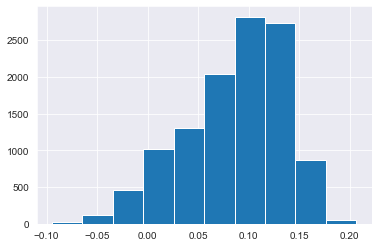

In [68]:
yy_scores = pd.Series(iso_model.decision_function(y_test)) 
pred = iso_model.predict(y_test)
plt.hist(yy_scores)

Text(0.5, 1.0, 'Isolation Forests - Employees Attribution classification')

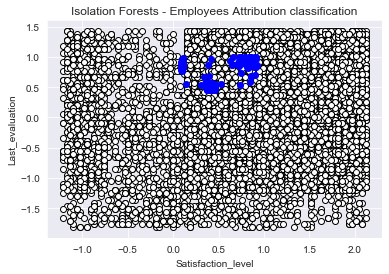

In [69]:
if_scores = iso_model.decision_function(y_test)
if_anomalies=iso_model.predict(y_test)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=x[if_anomalies==1]

y_testt = pd.DataFrame(y_test)
if_anomaly = pd.DataFrame(if_anomalies)

plt.scatter(y_testt.iloc[:,13],y_testt.iloc[:,14],c='white',edgecolor='k')
plt.scatter(if_anomaly.iloc[:,13],if_anomaly.iloc[:,14],c='blue')
plt.xlabel('Satisfaction_level')
plt.ylabel('Last_evaluation')
plt.title('Isolation Forests - Employees Attribution classification')


In [70]:
if_anomalies=iso_model.predict(y_test)
if_anomalies

array([ 1,  1,  1, ..., -1, -1,  1])

In [71]:
staying = []
leaving = []
for values in pred:
    if values == 1:
        leaving.append(values)
    else:
        staying.append(values)
print('The total amount of employees likely to leave the job is {}'.format(len(leaving)))
print('The total amount of employess likely to stay is {}'.format(len(staying)))

The total amount of employees likely to leave the job is 10706
The total amount of employess likely to stay is 722


In [72]:
'''
leaving = 10812 when  'Average_montly_hours','Last_evaluation', 'Satisfaction_level' are removed
leaving = 10697 when  'Average_montly_hours','Last_evaluation', are removed
leaving = 10706 when  all features where present
'''

"\nleaving = 10812 when  'Average_montly_hours','Last_evaluation', 'Satisfaction_level' are removed\nleaving = 10697 when  'Average_montly_hours','Last_evaluation', are removed\nleaving = 10706 when  all features where present\n"

------------------------------------------DBSCAN-IMPLEMENTATION---------------------------------------------

In [73]:
db_model = DBSCAN(eps=14, n_jobs=-1 )

In [74]:
db_model.fit(x_train)

DBSCAN(algorithm='auto', eps=14, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=-1, p=None)

In [75]:
xx = db_model.fit_predict(x_train)

In [76]:
db_preg = db_model.fit_predict(y_test)

In [77]:
staying = []
leaving = []
outsider = []
for values in db_preg:
    if values == 0:
        leaving.append(values)
    elif values == -1:
        staying.append(values)
    else:
        outsider.append(values)
print('The total amount of employees likely to leave the job is {}'.format(len(leaving)))
print('The total amount of employess likely to stay is {}'.format(len(staying)))
print('The total amount of outsiders {}'.format(len(outsider)))

The total amount of employees likely to leave the job is 11428
The total amount of employess likely to stay is 0
The total amount of outsiders 0


In [78]:
staying = []
leaving = []
outsider = []
for values in xx:
    
    if values ==0:
        leaving.append(values)
    elif values == -1:
        staying.append(values)
    else:
        outsider.append(values)
        
print('The total amount of employees likely to leave the job is {}'.format(len(leaving)))
print('The total amount of employess likely to stay is {}'.format(len(staying)))
print('The total amount of outsiders {}'.format(len(outsider)))

The total amount of employees likely to leave the job is 3571
The total amount of employess likely to stay is 0
The total amount of outsiders 0


----------------------------------Elliptic ENVELOPE-------------------------

In [79]:
envelop_model = EllipticEnvelope(contamination=0, random_state=0 )

In [80]:
envelop_model.fit(x_train)

EllipticEnvelope(assume_centered=False, contamination=0, random_state=0,
                 store_precision=True, support_fraction=None)

In [81]:
xx = envelop_model.predict(x_train)

In [82]:
staying = []
leaving = []
outsider = []
for values in xx:
    
    if values ==1:
        leaving.append(values)
    elif values ==-1:
        staying.append(values)
    else:
        outsider.append(values)
        
print('The total amount of employees likely to leave the job is {}'.format(len(leaving)))
print('The total amount of employess likely to stay is {}'.format(len(staying)))
print('The total amount of outsiders {}'.format(len(outsider)))

The total amount of employees likely to leave the job is 3571
The total amount of employess likely to stay is 0
The total amount of outsiders 0


In [83]:

yy_scores = pd.Series(envelop_model.decision_function(y_test)) 
yy_predict = envelop_model.predict(y_test)

In [84]:
staying = []
leaving = []
outsider = []
for values in yy_predict:
    
    if values ==1:
        leaving.append(values)
    elif values ==-1:
        staying.append(values)
    else:
        outsider.append(values)
        
print('The total amount of employees likely to leave the job is {}'.format(len(leaving)))
print('The total amount of employess likely to stay is {}'.format(len(staying)))
print('The total amount of outsiders {}'.format(len(outsider)))

The total amount of employees likely to leave the job is 10831
The total amount of employess likely to stay is 597
The total amount of outsiders 0


(array([  22.,   30.,   68.,   56.,   40.,   22.,   72.,  255., 2480.,
        8383.]),
 array([-3463.72066765, -3032.52047505, -2601.32028245, -2170.12008985,
        -1738.91989725, -1307.71970465,  -876.51951205,  -445.31931945,
          -14.11912685,   417.08106575,   848.28125835]),
 <a list of 10 Patch objects>)

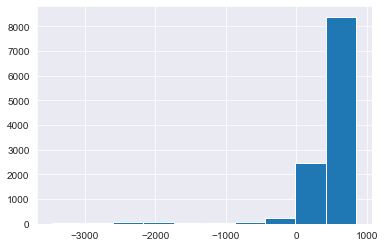

In [85]:
ee_scores = pd.Series(envelop_model.decision_function(y_test)) 
ee_predict = envelop_model.predict(y_test)
plt.hist(ee_scores)

Text(0.5, 1.0, 'Elliptic ENVELOPE - Employees Attribution classification')

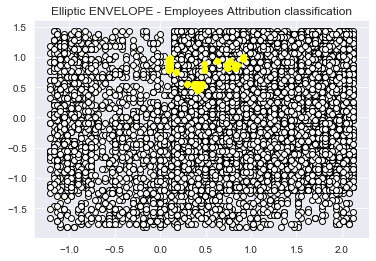

In [87]:
if_scores = envelop_model.decision_function(y_test)
if_anomalies=envelop_model.predict(y_test)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=x[if_anomalies==1]


y_testt = pd.DataFrame(y_test)
anomaly = pd.DataFrame(if_anomalies)

plt.scatter(y_testt.iloc[:,13],y_testt.iloc[:,14],c='white',edgecolor='k')
plt.scatter(anomaly.iloc[:,13],anomaly.iloc[:,14],c='yellow')

plt.title('Elliptic ENVELOPE - Employees Attribution classification')